# 1. Análsis Exploratorio

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.holtwinters import SimpleExpSmoothing, ExponentialSmoothing
from statsmodels.tsa.statespace.sarimax import SARIMAX
from sklearn.metrics import mean_squared_error, mean_absolute_error
from prophet import Prophet

/home/nelson/Documents/Uvg/Data Science/Lab1_DataScience/venv/lib/python3.13/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
Importing plotly failed. Interactive plots will not work.



Female Birth Dataset Head:
         Date  Births
0  1959-01-01      35
1  1959-01-02      32
2  1959-01-03      30
3  1959-01-04      31
4  1959-01-05      44

Female Birth Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 365 entries, 0 to 364
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Date    365 non-null    object
 1   Births  365 non-null    int64 
dtypes: int64(1), object(1)
memory usage: 5.8+ KB
None

Female Birth Descripción Estadística:
           Births
count  365.000000
mean    41.980822
std      7.348257
min     23.000000
25%     37.000000
50%     42.000000
75%     46.000000
max     73.000000

Female Birth Dataset Head:
         Date  Births
0  1959-01-01      35
1  1959-01-02      32
2  1959-01-03      30
3  1959-01-04      31
4  1959-01-05      44

Female Birth Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 365 entries, 0 to 364
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dty

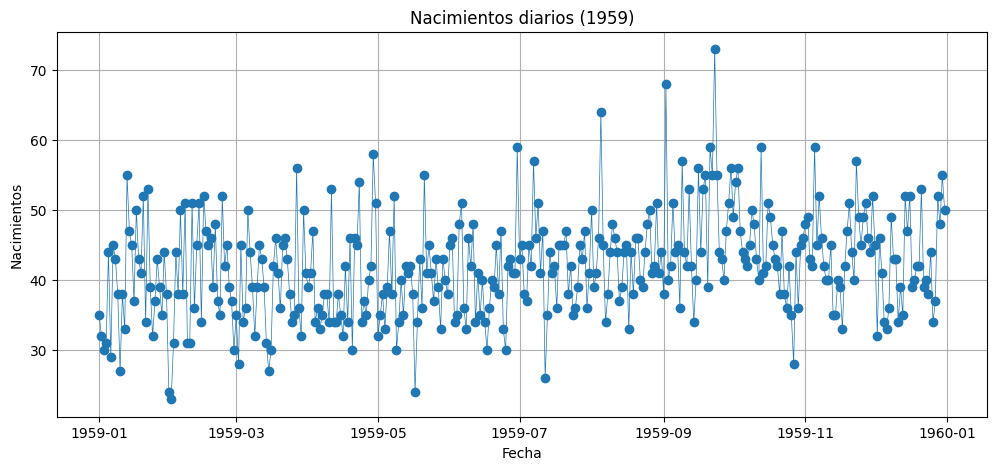


Nulos en Female Birth:
 Date      0
Births    0
dtype: int64


In [3]:
# Cargar los datos
births = pd.read_csv('data/daily-total-female-births.csv')

print("\nFemale Birth Dataset Head:")
print(births.head())
print("\nFemale Birth Info:")
print(births.info())
print("\nFemale Birth Descripción Estadística:")
print(births.describe())

# 2. Visualización general de los datasets
print("\nFemale Birth Dataset Head:")
print(births.head())
print("\nFemale Birth Info:")
print(births.info())
print("\nFemale Birth Descripción Estadística:")
print(births.describe())

# 3. Conversión de fechas para ambos datasets
births['Date'] = pd.to_datetime(births['Date'])

# 4. Graficar series de tiempo
plt.figure(figsize=(12,5))
plt.plot(births['Date'], births['Births'], marker='o', linewidth=0.5)
plt.title('Nacimientos diarios (1959)')
plt.xlabel('Fecha')
plt.ylabel('Nacimientos')
plt.grid(True)
plt.show()

# 5. Comprobar valores nulos
print("\nNulos en Female Birth:\n", births.isnull().sum())

# 2. Promedios Móviles


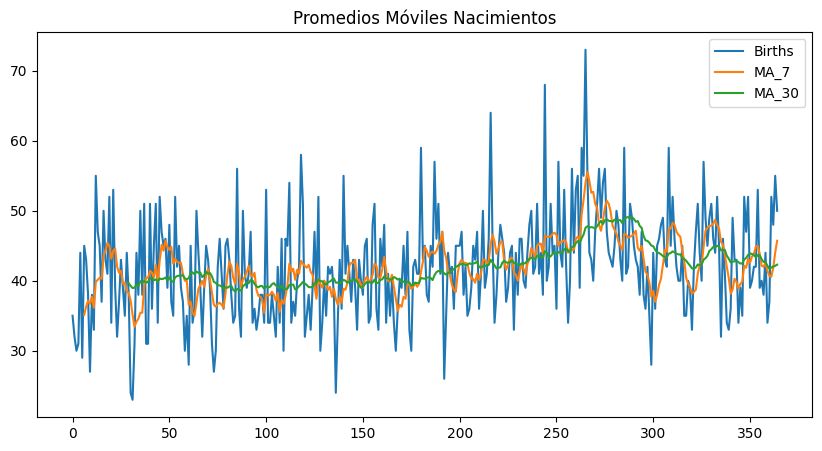

In [4]:
births['MA_7'] = births['Births'].rolling(window=7).mean()
births['MA_30'] = births['Births'].rolling(window=30).mean()

births[['Births', 'MA_7', 'MA_30']].plot(figsize=(10,5), title="Promedios Móviles Nacimientos")
plt.show()

# 3. Alisamiento Exponencial

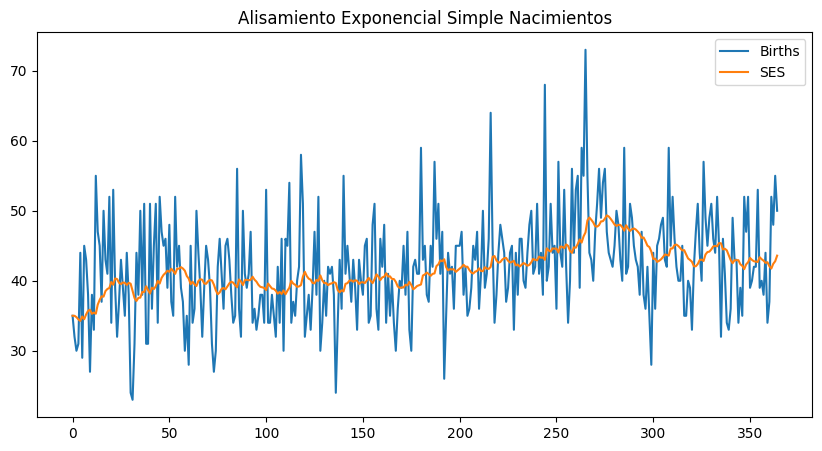

In [5]:
ses_model_b = SimpleExpSmoothing(births['Births']).fit()
births['SES'] = ses_model_b.fittedvalues

births[['Births', 'SES']].plot(figsize=(10,5), title="Alisamiento Exponencial Simple Nacimientos")
plt.show()

# 4. HOLT-WINTERS

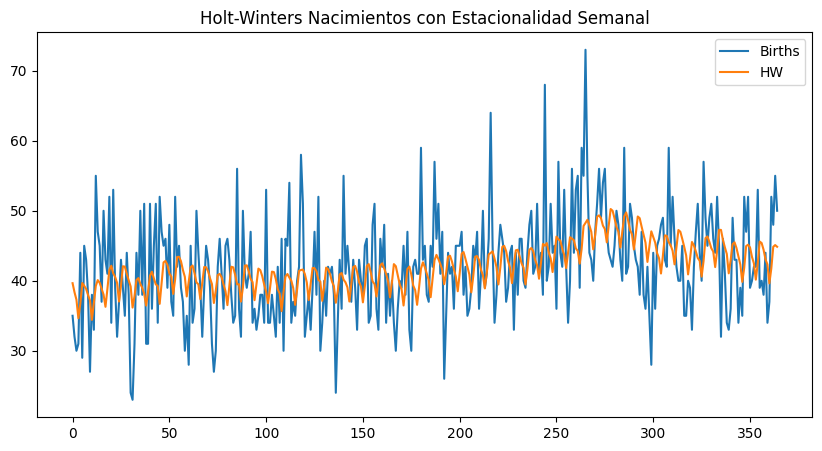

In [6]:
hw_model_b = ExponentialSmoothing(births['Births'], trend='add', seasonal='add', seasonal_periods=7).fit()

births['HW'] = hw_model_b.fittedvalues

births[['Births', 'HW']].plot(figsize=(10,5), title="Holt-Winters Nacimientos con Estacionalidad Semanal")
plt.show()

# 5. SARIMA

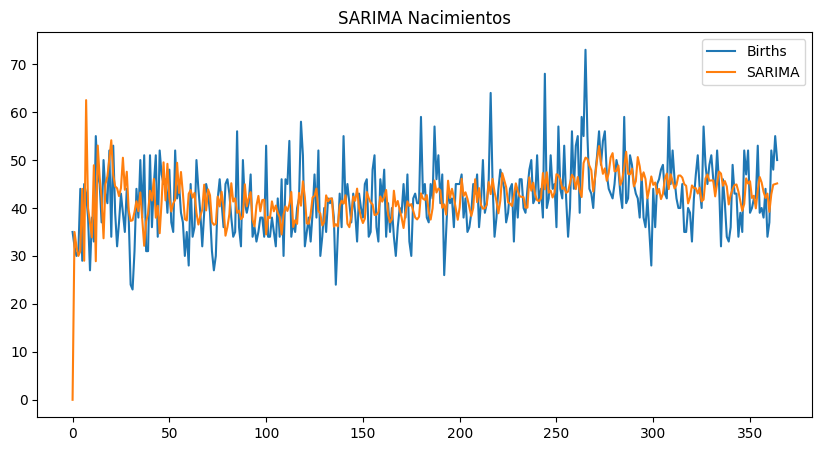

In [7]:
sarima_model_b = SARIMAX(births['Births'], order=(1,1,1), seasonal_order=(1,1,1,7)).fit()
births['SARIMA'] = sarima_model_b.fittedvalues

births[['Births', 'SARIMA']].plot(figsize=(10,5), title="SARIMA Nacimientos")
plt.show()

# 6. Prophet

00:08:23 - cmdstanpy - INFO - Chain [1] start processing
00:08:23 - cmdstanpy - INFO - Chain [1] done processing


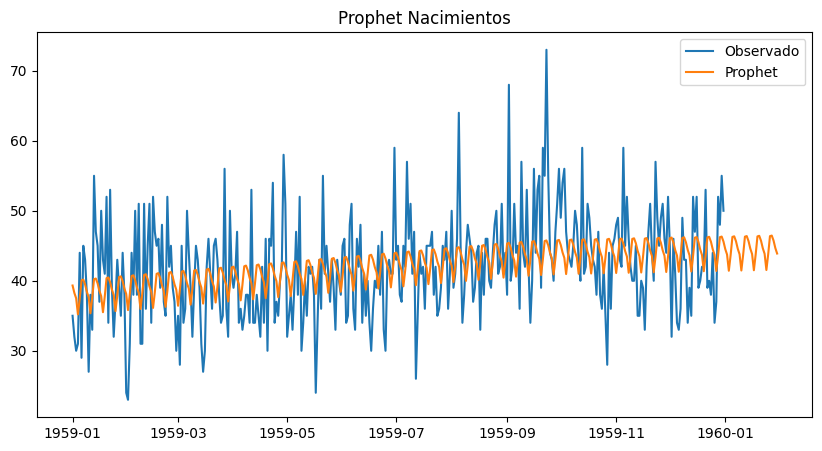

In [8]:
prophet_df_b = births.reset_index().rename(columns={'Date':'ds', 'Births':'y'})
prophet_model_b = Prophet(daily_seasonality=True)
prophet_model_b.fit(prophet_df_b)
future_b = prophet_model_b.make_future_dataframe(periods=30)
forecast_b = prophet_model_b.predict(future_b)

plt.figure(figsize=(10,5))
plt.plot(prophet_df_b['ds'], prophet_df_b['y'], label='Observado')
plt.plot(forecast_b['ds'], forecast_b['yhat'], label='Prophet')
plt.legend()
plt.title("Prophet Nacimientos")
plt.show()

# 7. Comparación y Evaluación

In [10]:
def evaluate(true, pred):
    return {
        'RMSE': mean_squared_error(true, pred) ** 0.5,
        'MAE' : mean_absolute_error(true, pred)
    }


results_b = {
    'SES': evaluate(births['Births'], births['SES']),
    'HW': evaluate(births['Births'], births['HW']),
    'SARIMA': evaluate(births['Births'].iloc[1:], births['SARIMA'].iloc[1:]),
    'Prophet': evaluate(prophet_df_b['y'], forecast_b['yhat'][:len(prophet_df_b)])
}

print("Resultados de Evaluación Nacimientos:")
for model, metrics in results_b.items():
    print(f"{model}: RMSE={metrics['RMSE']:.2f}, MAE={metrics['MAE']:.2f}")

Resultados de Evaluación Nacimientos:
SES: RMSE=7.07, MAE=5.59
HW: RMSE=6.85, MAE=5.44
SARIMA: RMSE=7.41, MAE=5.78
Prophet: RMSE=6.83, MAE=5.38
